# Análise de dados do comércio varejista 

In [1]:
# Importação de bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt 

In [170]:
# Carregamento dos dados
dados = pd.read_csv("dados/dataset.csv")

In [3]:
# Conferência inicial - tamanho do df, variáveis contidas
dados.shape # nº de linhas,  nº de colunas
dados.dtypes # Verificação das variáveis e o tipo de cada uma delas
dados.isnull().sum() # Conferência do preenchimento
dados.head() 

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [4]:
# Pergunta de negócio 1 - Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?
dados_office_supplies = dados[dados['Categoria'] == "Office Supplies"]
cidades_vendas = dados_office_supplies.groupby("Cidade")["Valor_Venda"].sum()
cidade_maior_venda = cidades_vendas.idxmax()
print(f"A cidade com o maior número de vendas é {cidade_maior_venda}")

A cidade com o maior número de vendas é New York City


In [5]:

cidades_vendas.index
cidades_vendas.values

array([2.5500000e+01, 1.3920000e+00, 1.1076460e+03, 9.4312200e+02,
       4.8797900e+03, 2.4720000e+01, 8.1987600e+02, 2.0451000e+01,
       7.3920000e+01, 2.5275480e+03, 8.0950000e+01, 2.4016300e+02,
       1.9440000e+01, 7.7466600e+02, 2.5176000e+02, 2.1560000e+01,
       3.7738520e+03, 1.4112000e+01, 6.2640000e+00, 1.1141600e+02,
       1.9825000e+02, 1.1011940e+04, 2.3360000e+01, 2.2448380e+03,
       3.0395140e+03, 2.8593000e+03, 7.9032000e+01, 3.2773800e+02,
       1.6379700e+03, 3.6170000e+02, 8.8960000e+01, 1.4460000e+01,
       1.0368000e+01, 2.3548000e+01, 7.2672000e+01, 1.3460700e+03,
       8.3382000e+01, 2.5120000e+01, 1.3792440e+03, 2.5831900e+03,
       8.2880000e+00, 5.9364800e+02, 4.4544000e+01, 3.3040000e+00,
       6.9828000e+01, 6.4052000e+02, 7.9864100e+02, 9.5433000e+01,
       4.3660000e+01, 3.7728760e+03, 5.2410000e+01, 5.4980000e+02,
       2.4740000e+01, 6.2192000e+01, 5.8524800e+02, 6.5840000e+01,
       3.0706860e+03, 7.9200000e+00, 1.8561900e+03, 4.1525600e

Text(0.5, 0, 'Valor de venda')

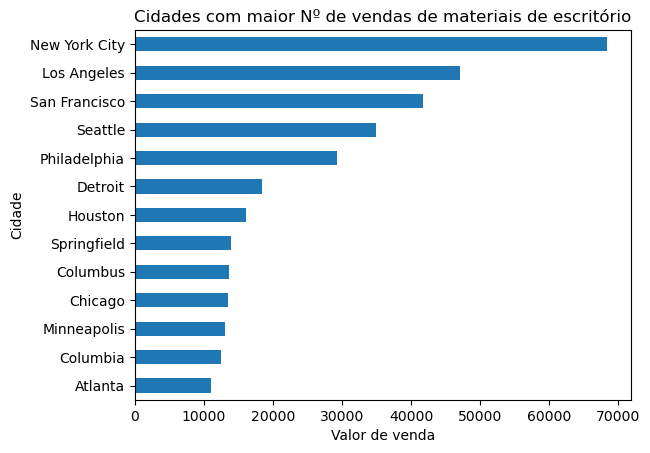

In [6]:
# Pergunta 1 - Plot
cidades_maiores_vendas = cidades_vendas.where( cidades_vendas > 10000).dropna()
cidades_maiores_vendas_ord = cidades_maiores_vendas.sort_values(ascending = True)
plot1 = cidades_maiores_vendas_ord.plot(kind = "barh", title = "Cidades com maior Nº de vendas de materiais de escritório")
plot1.set_xlabel("Valor de venda")

In [116]:
# Pergunta de negócio 2 - Qual o Total de Vendas Por Data do Pedido?
total_por_data = dados.groupby("Data_Pedido")["Valor_Venda"].sum()
#total_por_data.dtype
#type(total_por_data)
total_por_data.index = pd.to_datetime(total_por_data.index, format = "%d/%m/%Y")
total_por_data_ord = total_por_data.sort_index()

total_por_data_ord_MY= total_por_data_ord.groupby(pd.Grouper(freq="M")).sum()


Text(0.5, 0, 'Data de venda')

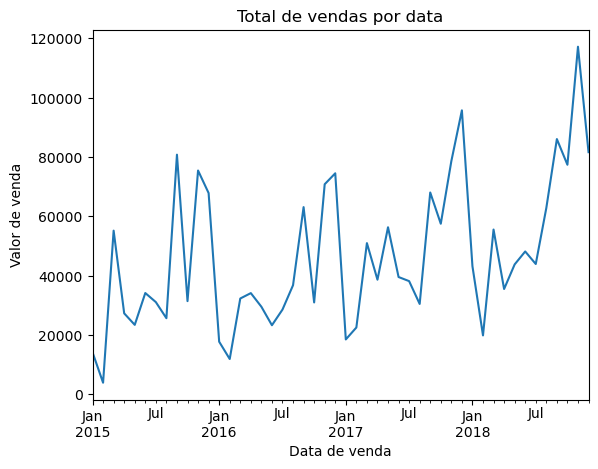

In [117]:
# Pergunta 2 - Plot

plot2 = total_por_data_ord_MY.plot( kind = "line", title = "Total de vendas por data")
plot2.set_ylabel("Valor de venda")
plot2.set_xlabel("Data de venda")

In [9]:
# Pergunta 3 - Qual o Total de Vendas por Estado?
vendas_estado = dados.groupby("Estado")["Valor_Venda"].sum()
vendas_estado = vendas_estado.sort_values(ascending = True)

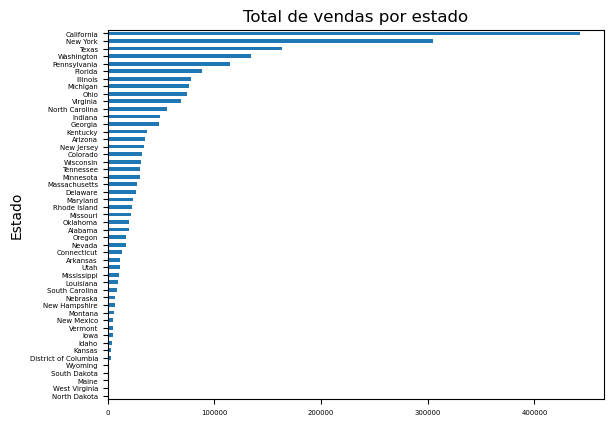

In [10]:
# Pergunta 3 - Plot

plot3 = vendas_estado.plot(kind = "barh", title = "Total de vendas por estado", fontsize = "5")

In [11]:
# Pergunta 4 - Quais São as 10 Cidades com Maior Total de Vendas?
total_por_cidade = dados.groupby("Cidade")["Valor_Venda"].sum() 
total_por_cidade_ord = total_por_cidade.sort_values(ascending = False)
total_por_cidade_10primeiras = total_por_cidade_ord.head(n = 10)

Text(0.5, 0, 'Valor total de vendas')

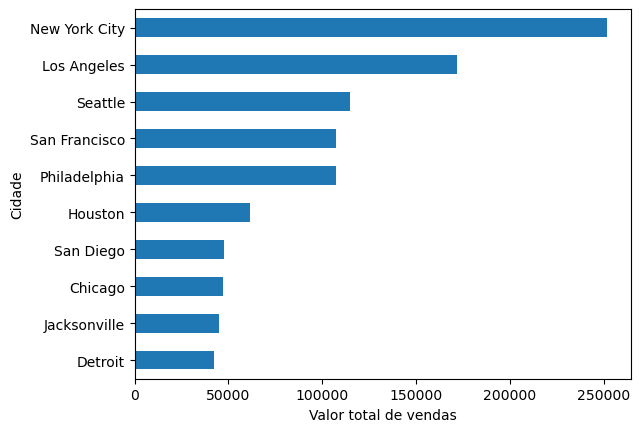

In [12]:
# Pergunta 4 - plot
total_por_cidade_10primeiras = total_por_cidade_10primeiras.sort_values(ascending = True)
plot4 = total_por_cidade_10primeiras.plot(kind = "barh")
plot4.set_xlabel("Valor total de vendas")

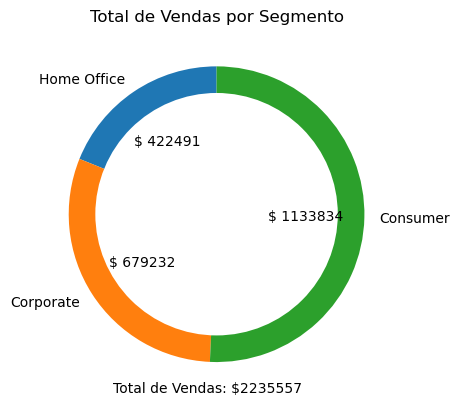

In [137]:
# Pergunta 5 - Qual Segmento Teve o Maior Total de Vendas?

segmento_vendas = dados.groupby("Segmento")["Valor_Venda"].sum().reset_index().sort_values(by = "Valor_Venda",
                                                                                           ascending = True)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100))
        return "$ {v:d}".format(v = val)
    return my_format

plt.pie(segmento_vendas["Valor_Venda"],
        labels = segmento_vendas["Segmento"],
        autopct = autopct_format(segmento_vendas["Valor_Venda"]),
        startangle= 90)

centre_circle = plt.Circle((0,0),0.82,fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate(text = "Total de Vendas: "+"$"+ str(int(sum(segmento_vendas["Valor_Venda"]))), xy = (-0.7,-1.2))
plt.title("Total de Vendas por Segmento")
plt.show()


<Axes: xlabel='Ano'>

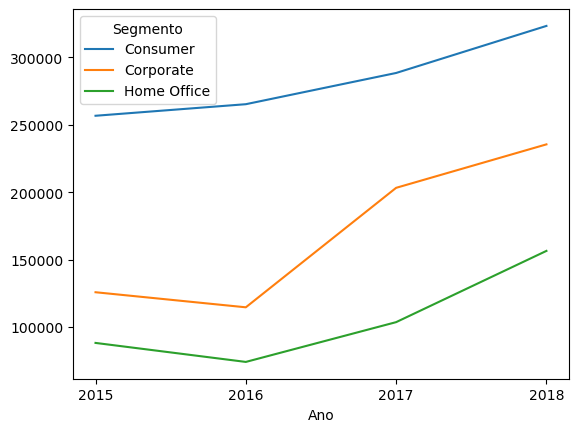

In [60]:
# Pergunta 6 - Qual o Total de Vendas Por Segmento e Por Ano?
dados[["Dia","Mes", "Ano"]] = dados["Data_Pedido"].str.split("/", expand = True)
total_por_ano_seg = dados.groupby(["Ano", "Segmento"])["Valor_Venda"].sum()
sns.lineplot(data=total_por_ano_seg, x="Ano", y= total_por_ano_seg.values, hue="Segmento")
#total_por_ano_seg.plot(x = "Ano", y = "Valor_Venda", color = "Segmento", title= "Total por segmento por ano")

In [141]:


dados["Desconto"].value_counts()

Desconto
10    9243
15     457
Name: count, dtype: int64

Desconto
10    9243
15     457
Name: count, dtype: int64


<Axes: xlabel='Desconto'>

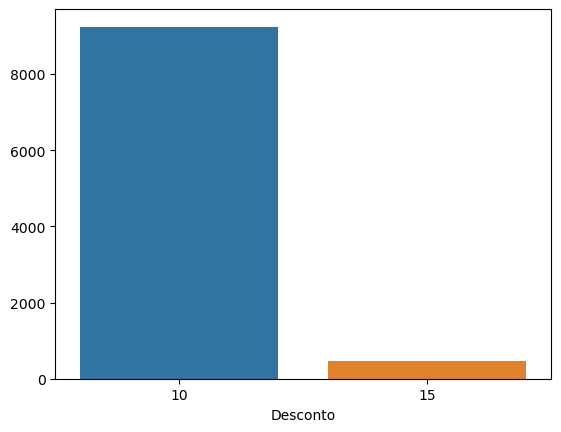

In [146]:
# Pergunta 7 -     Os gestores da empresa estão considerando conceder diferentes faixas de descontos 
# e gostariam de fazer uma simulação com base na regra abaixo:

    # Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
    # Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
    # Quantas Vendas Receberiam 15% de Desconto?

dados["Desconto"] = 0
for i in dados.index:
    if dados["Valor_Venda"][i] > 1000:
       dados.loc[i, "Desconto"] = 15
    else:
        dados.loc[i, "Desconto"] = 10
# Alternativa
# dados["Desconto"] = np.where(dados["Valor_Venda"] > 1000, 15, 10)


contagem = dados["Desconto"].value_counts()
print(contagem)
sns.barplot(x=contagem.index, y=contagem.values)


In [150]:
# Pergunta 8 - Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. 
# Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?
antes_15 = dados.loc[dados["Desconto"] ==15, "Valor_Venda"]
valor_venda_medio_antes = antes_15.mean()

dados["Valor_Venda_Desconto"] =0
for i in dados.index:
    dados.loc[i, "Valor_Venda_Desconto"] = dados.loc[i, "Valor_Venda"]-(dados.loc[i, "Valor_Venda"]*(dados.loc[i, "Desconto"]/100))  
depois_15 = dados.loc[dados["Desconto"] == 15, "Valor_Venda_Desconto"]

valor_venda_medio_depois = depois_15.mean()
print(f"O valor de venda médio antes do desconto seria de {valor_venda_medio_antes.round(2)} e cairia para {valor_venda_medio_depois.round(2)}, após o desconto")

O valor de venda médio antes do desconto seria de 2116.81 e cairia para 1799.29, após o desconto


/home/gibueno/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

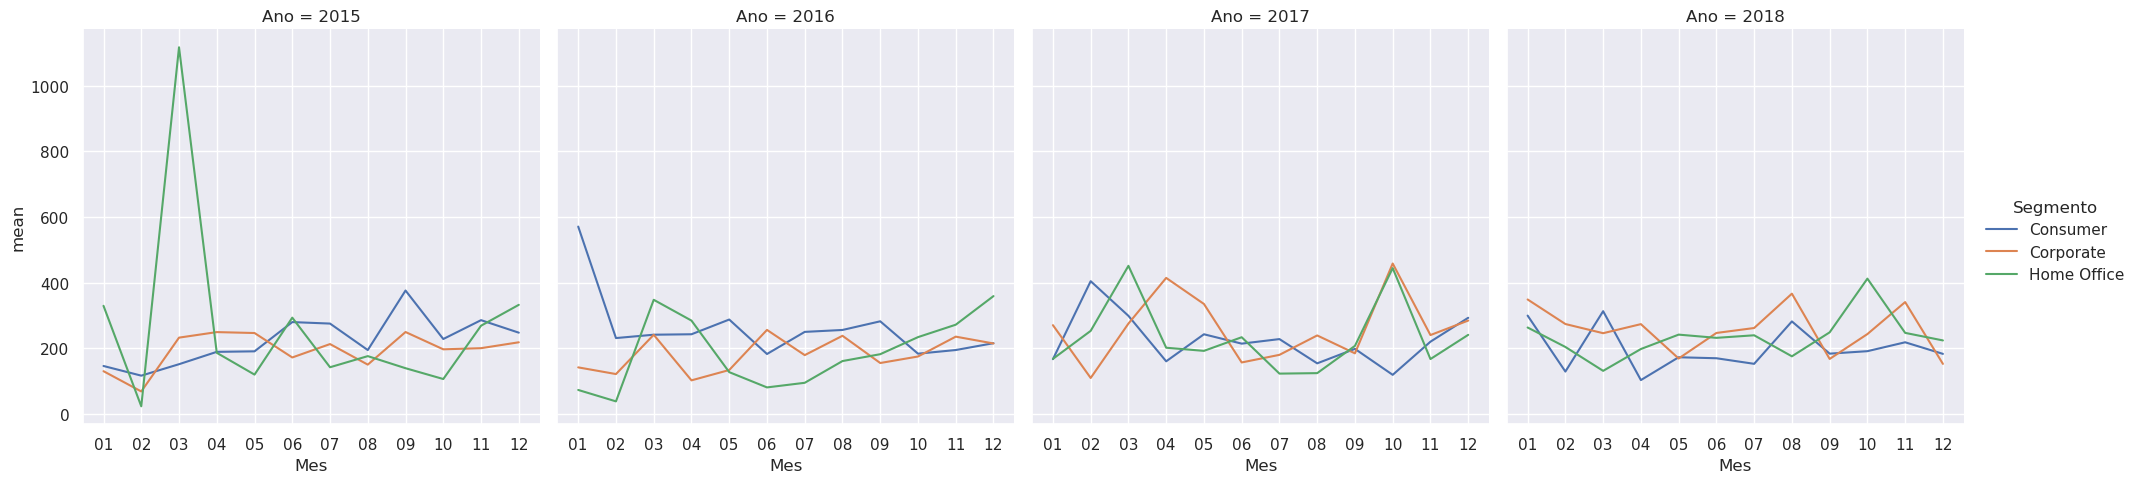

In [155]:
# Pergunta 9 - Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
media_seg = dados.groupby(["Segmento", "Ano", "Mes"])["Valor_Venda"].agg([np.sum, np.mean, np.median])

# Extração dos níveis

segmento = media_seg.index.get_level_values(0)
ano = media_seg.index.get_level_values(1)
mes = media_seg.index.get_level_values(2)


# Plot

plt.figure(figsize = (12,6))
sns.set()
plot6 = sns.relplot(kind = "line",
                    data = media_seg,
                    y = "mean",
                    x = mes,
                    hue = segmento,
                    col = ano, 
                    col_wrap = 4)

In [189]:
# Pergunta 10 - Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?
top_12 = dados.groupby(["Categoria", "SubCategoria"]).sum(numeric_only = True).sort_values( "Valor_Venda",
    ascending = False).head(12)

top_categorias_sub = top_12[["Valor_Venda"]].astype(int).sort_values(by = "Categoria").reset_index()

In [190]:
top_categorias_sub

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [197]:
# Dataframe somente com os totais por categoria
top_categorias = top_categorias_sub.groupby('Categoria').sum(numeric_only = True).reset_index()
top_categorias

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [191]:
# Lista de cores
# Categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']
#Subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

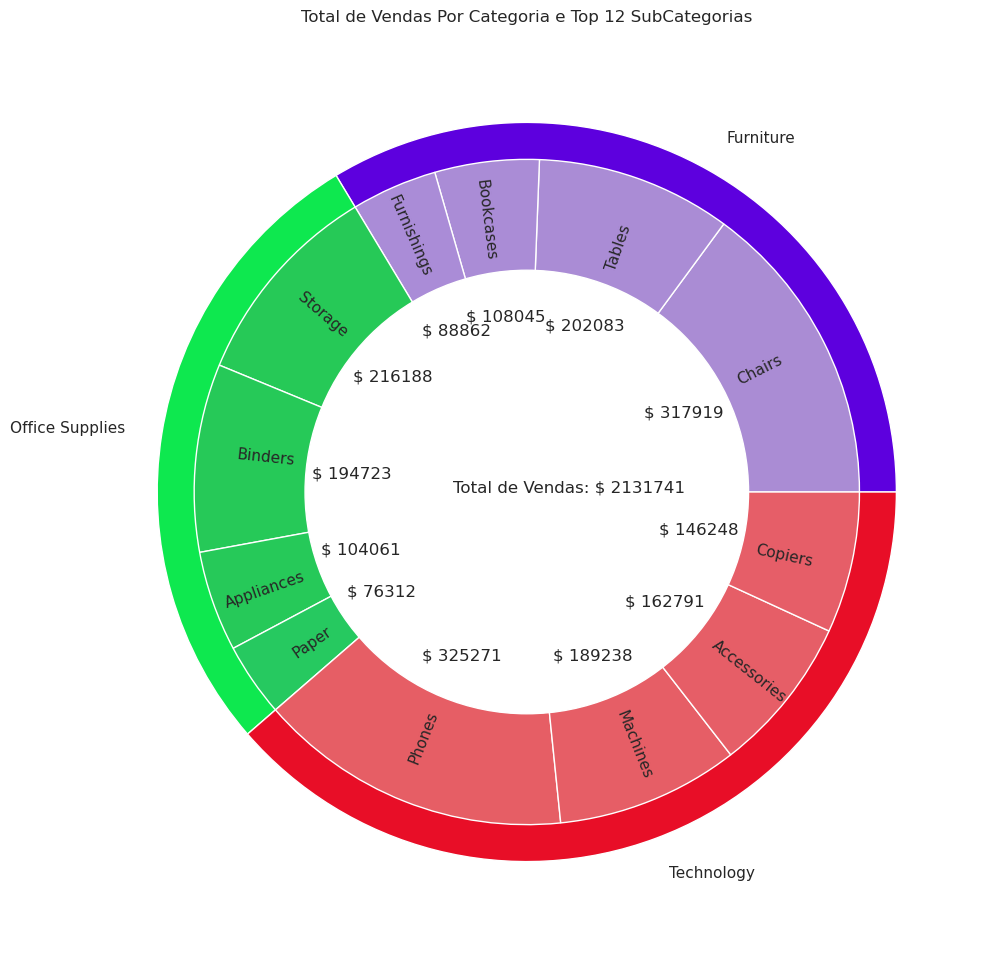

In [198]:
# Pergunta 10 - Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(top_categorias['Valor_Venda'], 
            radius = 1,
            labels = top_categorias['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(top_categorias_sub['Valor_Venda'],
            radius = 0.9,
            labels = top_categorias_sub['SubCategoria'],
            autopct = autopct_format(top_categorias_sub['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(top_categorias_sub['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()